In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fashion=pd.read_csv('FashionDataset.csv')

In [3]:
fashion

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...,...
30753,21,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30754,22,Nan,Nan,Nan,Nan,Nan,Nan,Jewellery-Women
30755,23,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,24,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [4]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [5]:
fashion.describe()

,Unnamed: 0
count,30758.000000
mean,12.500000
std,7.500122
min,0.000000
25%,6.000000
50%,12.500000
75%,19.000000
max,25.000000


In [6]:
fashion.drop('Unnamed: 0',axis=1 ,inplace = True)

In [7]:

fashion=fashion.rename(columns={'BrandName':'Brand'})
fashion=fashion.rename(columns={'Deatils':'Details'})

In [8]:
fashion.isna().any()

Brand        False
Details      False
Sizes        False
MRP          False
SellPrice    False
Discount     False
Category     False
dtype: bool

In [9]:
fashion.replace('Nan',inplace = True)

In [10]:
fashion['MRP']=fashion['MRP'].str.strip('Rs\n').astype(int)
fashion['MRP']

0        1699
1        3499
2        1199
3        2299
4        1699
         ... 
30753     449
30754     449
30755    1839
30756    1839
30757    1839
Name: MRP, Length: 30758, dtype: int32

In [11]:
fashion.dtypes

Brand        object
Details      object
Sizes        object
MRP           int32
SellPrice    object
Discount     object
Category     object
dtype: object

In [12]:
fashion['SellPrice']=fashion['SellPrice'].astype(int)

In [13]:
fashion['Discount']=fashion['Discount'].str.strip('% off').astype(int)

In [14]:
fashion=fashion.loc[fashion.duplicated()]

In [15]:
fashion

,Brand,Details,Sizes,MRP,SellPrice,Discount,Category
22,life,solid wide neck viscose womens regular top - blue,"Size:Large,Medium,Small,X-Large,X-Small",1299,649,50,Westernwear-Women
24,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",1999,999,50,Westernwear-Women
48,life,printed viscose wide neck womens regular dress...,"Size:Large,Medium,Small,X-Large,X-Small",1299,649,50,Westernwear-Women
74,stop,printed viscose regular neck womens top - white,"Size:Large,Medium,Small,X-Large,X-Small,XX-Large",999,499,50,Westernwear-Women
100,stop,solid polyester regular neck womens top - sage,"Size:Large,Medium,Small,X-Large,XX-Large",1299,649,50,Westernwear-Women
...,...,...,...,...,...,...,...
30702,skagen,elin rose gold bracelet - skj0851791,Size:Error Size,599,5795,50,Jewellery-Women
30716,ayesha,womens stone studded drop earrings - multi,Size:Error Size,698,349,50,Jewellery-Women
30728,fossil,vintage gl two tone bracelet - jf02311040,Size:Error Size,2399,4795,5,Jewellery-Women
30735,jewelz,cotton multicolour girls hair bands,Size:Error Size,999,349,65,Jewellery-Women


In [16]:
split=fashion['Category'].str.split('-',n=1,expand=True)


In [17]:
fashion.insert(fashion.columns.get_loc('Discount')+1,'Sub Category',split[0])


In [18]:
fashion.insert(fashion.columns.get_loc('Sub Category')+1,'Main Category',split[1])

In [19]:
fashion

,Brand,Details,Sizes,MRP,SellPrice,Discount,Sub Category,Main Category,Category
22,life,solid wide neck viscose womens regular top - blue,"Size:Large,Medium,Small,X-Large,X-Small",1299,649,50,Westernwear,Women,Westernwear-Women
24,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",1999,999,50,Westernwear,Women,Westernwear-Women
48,life,printed viscose wide neck womens regular dress...,"Size:Large,Medium,Small,X-Large,X-Small",1299,649,50,Westernwear,Women,Westernwear-Women
74,stop,printed viscose regular neck womens top - white,"Size:Large,Medium,Small,X-Large,X-Small,XX-Large",999,499,50,Westernwear,Women,Westernwear-Women
100,stop,solid polyester regular neck womens top - sage,"Size:Large,Medium,Small,X-Large,XX-Large",1299,649,50,Westernwear,Women,Westernwear-Women
...,...,...,...,...,...,...,...,...,...
30702,skagen,elin rose gold bracelet - skj0851791,Size:Error Size,599,5795,50,Jewellery,Women,Jewellery-Women
30716,ayesha,womens stone studded drop earrings - multi,Size:Error Size,698,349,50,Jewellery,Women,Jewellery-Women
30728,fossil,vintage gl two tone bracelet - jf02311040,Size:Error Size,2399,4795,5,Jewellery,Women,Jewellery-Women
30735,jewelz,cotton multicolour girls hair bands,Size:Error Size,999,349,65,Jewellery,Women,Jewellery-Women


In [20]:
fashion.drop('Category',axis=1 ,inplace = True)

In [21]:
fashion

,Brand,Details,Sizes,MRP,SellPrice,Discount,Sub Category,Main Category
22,life,solid wide neck viscose womens regular top - blue,"Size:Large,Medium,Small,X-Large,X-Small",1299,649,50,Westernwear,Women
24,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",1999,999,50,Westernwear,Women
48,life,printed viscose wide neck womens regular dress...,"Size:Large,Medium,Small,X-Large,X-Small",1299,649,50,Westernwear,Women
74,stop,printed viscose regular neck womens top - white,"Size:Large,Medium,Small,X-Large,X-Small,XX-Large",999,499,50,Westernwear,Women
100,stop,solid polyester regular neck womens top - sage,"Size:Large,Medium,Small,X-Large,XX-Large",1299,649,50,Westernwear,Women
...,...,...,...,...,...,...,...,...
30702,skagen,elin rose gold bracelet - skj0851791,Size:Error Size,599,5795,50,Jewellery,Women
30716,ayesha,womens stone studded drop earrings - multi,Size:Error Size,698,349,50,Jewellery,Women
30728,fossil,vintage gl two tone bracelet - jf02311040,Size:Error Size,2399,4795,5,Jewellery,Women
30735,jewelz,cotton multicolour girls hair bands,Size:Error Size,999,349,65,Jewellery,Women


C:\Users\kashan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


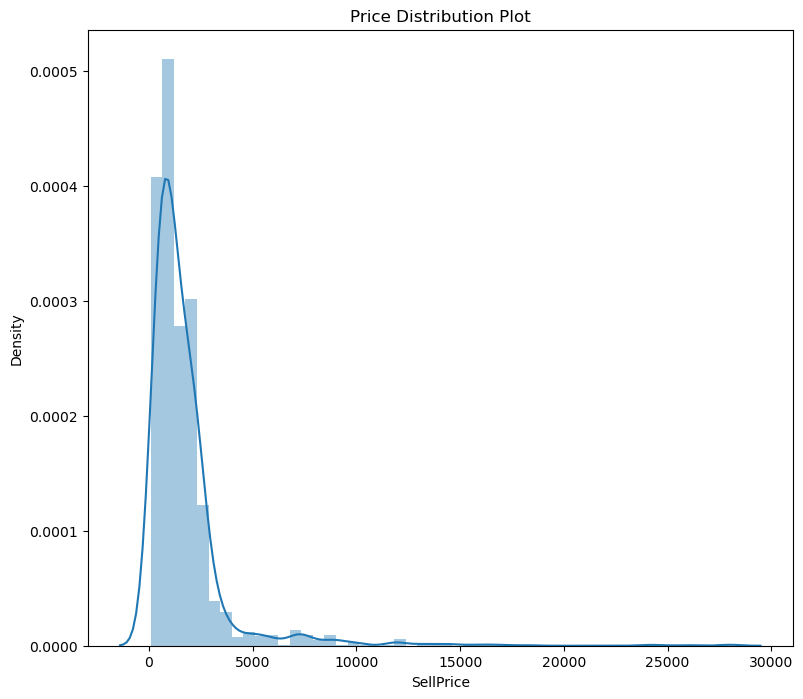

In [43]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
ind_ax=sns.distplot(fashion.SellPrice)

plt.show()

# Which Brand is Most Expensive

In [23]:
max_price=fashion['SellPrice'].max()
max_price

28000

In [24]:
brand=fashion.loc[ max_price == fashion['SellPrice'],'Brand'].iloc[0]
brand

'tissot'

In [25]:
Category=fashion.loc[ max_price == fashion['SellPrice'],'Main Category'].iloc[0]
Category

'Women'

# Tissot is the most expensive brand in women category with price 28000 Rs

In [26]:
max_price=fashion.groupby(['Brand','Sub Category'])['SellPrice'].max().reset_index().sort_values(by='SellPrice',ascending=False).head(10)

In [27]:
max_price

,Brand,Sub Category,SellPrice
159,tissot,Watches,28000
47,emporio armani,Watches,27995
113,michael kors,Watches,25995
61,fossil,Watches,23995
160,titan,Watches,16495
154,swarovski,Jewellery,15500
161,tommy hilfiger,Watches,13495
26,casio,Watches,13045
33,coach,Watches,11995
15,anne klein,Watches,11995


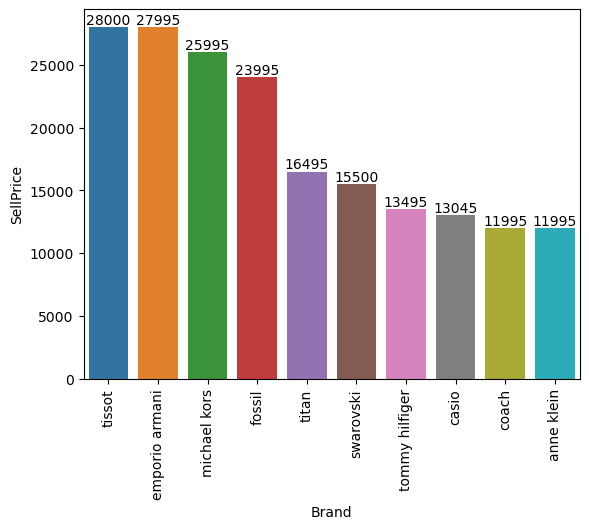

In [41]:

ind_ax=sns.barplot(data=max_price,x='Brand',y='SellPrice')
for container in ind_ax.containers:
    ind_ax.bar_label(container)

plt.xticks(rotation=90)
plt.show()

Most Expensive Brand and category is Tissot and watches

In [29]:
min_price=fashion['SellPrice'].min()
min_price

89

In [30]:
min_brand=fashion.loc[ min_price == fashion['SellPrice'],'Brand'].iloc[0]
min_brand

'ayesha'

In [31]:
min_category=fashion.loc[ min_price == fashion['SellPrice'],'Main Category'].iloc[0]
min_category

'Women'

In [32]:
min_price=fashion.groupby(['Brand','Sub Category'])['SellPrice'].min().reset_index().sort_values(by='SellPrice').head(10)
min_price

,Brand,Sub Category,SellPrice
20,ayesha,Jewellery,89
82,insense,Lingerie&Nightwear,119
106,life,Westernwear,124
145,soie,Lingerie&Nightwear,192
81,infuse,Westernwear,199
151,stop,Westernwear,199
150,stop,Indianwear,199
83,insense,Westernwear,199
48,enamor,Lingerie&Nightwear,199
11,altlife,Westernwear,199


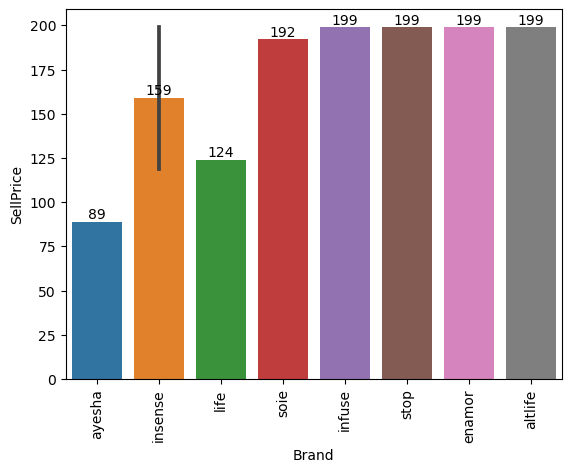

In [40]:

ind_ax=sns.barplot(data=min_price,x='Brand',y='SellPrice')
for container in ind_ax.containers:
    ind_ax.bar_label(container)

plt.xticks(rotation=90)
plt.show()

The most cheapest brand and category are Ayesha and Jewellery

In [34]:
optional_clothing=fashion.groupby(['Sub Category']).count().reset_index()
optional_clothing

,Sub Category,Brand,Details,Sizes,MRP,SellPrice,Discount,Main Category
0,Footwear,171,171,171,171,171,171,171
1,Fragrance,20,20,20,20,20,20,20
2,Indianwear,807,807,807,807,807,807,807
3,Jewellery,116,116,116,116,116,116,116
4,Lingerie&Nightwear,187,187,187,187,187,187,187
5,Watches,84,84,84,84,84,84,84
6,Westernwear,573,573,573,573,573,573,573


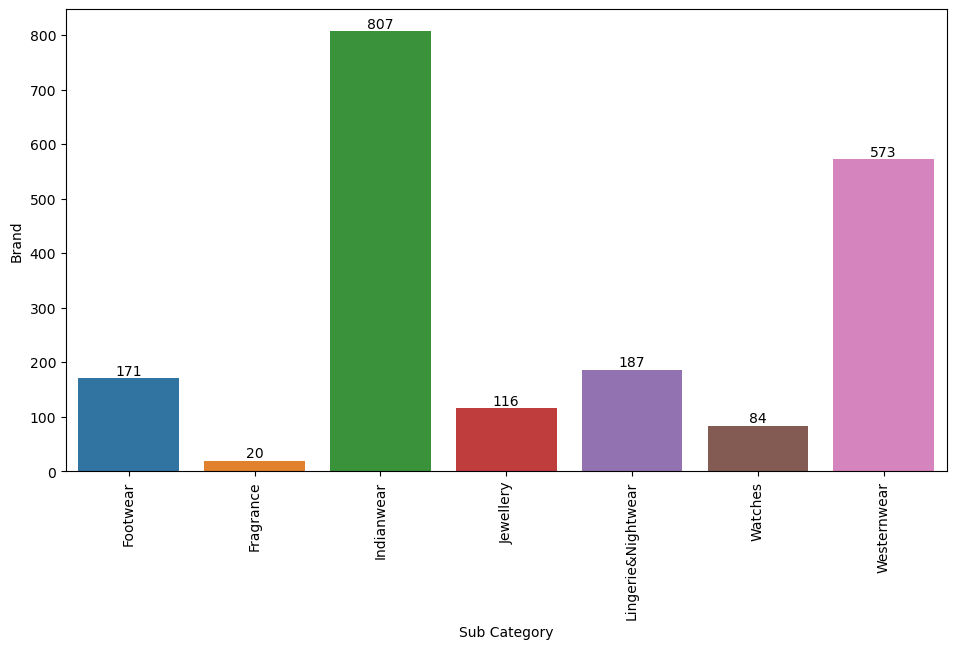

In [39]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)

ind_ax=sns.barplot(x='Sub Category' , y='Brand' ,data=optional_clothing)
plt.xticks(rotation=90)
for container in ind_ax.containers:
    ind_ax.bar_label(container)


plt.show()

IndianWear category have max number of brands

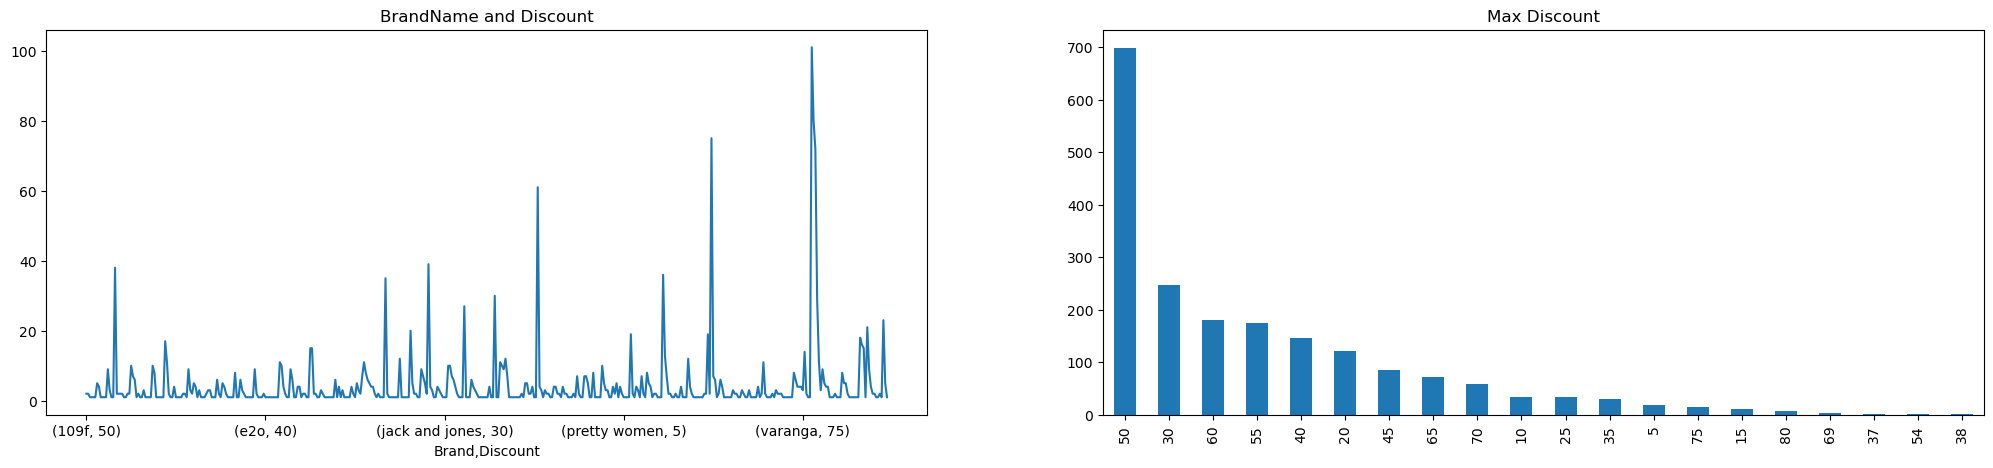

In [36]:
plt.figure(figsize=(25,5))


plt.subplot(1,2,1)
plt.title('BrandName and Discount')
fashion.groupby(['Brand'])['Discount'].value_counts().plot()

plt.subplot(1,2,2)
plt.title('Max Discount')
fashion['Discount'].value_counts().head(20).plot(kind='bar')
plt.show()

C:\Users\kashan\AppData\Local\Temp\ipykernel_4860\776001359.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(max_dis,'.', alpha=0.6, markersize=50,marker='o')


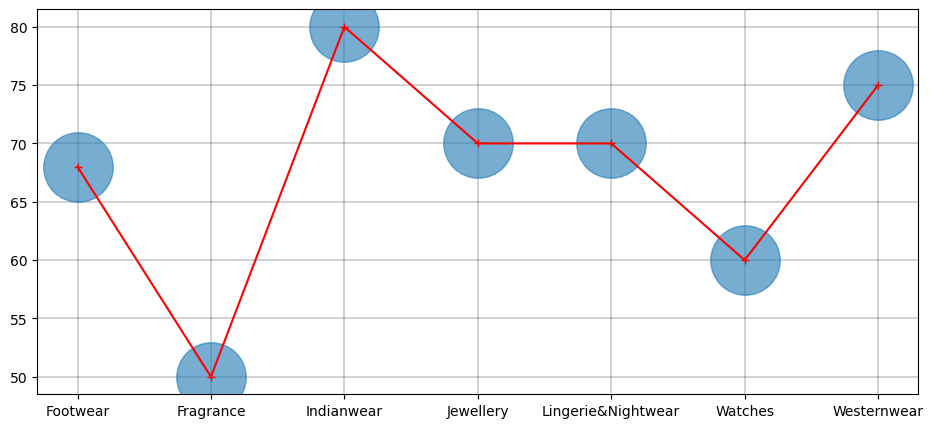

In [37]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
max_dis=fashion.groupby(['Sub Category'])['Discount'].max()
max_dis
plt.grid(color='black',linewidth = 0.25)
plt.plot(max_dis,'.', alpha=0.6, markersize=50,marker='o')
plt.plot(max_dis,color='red',marker='+')
plt.show()

# From the above plot, we can say that maximum Discount is given on IndianWear

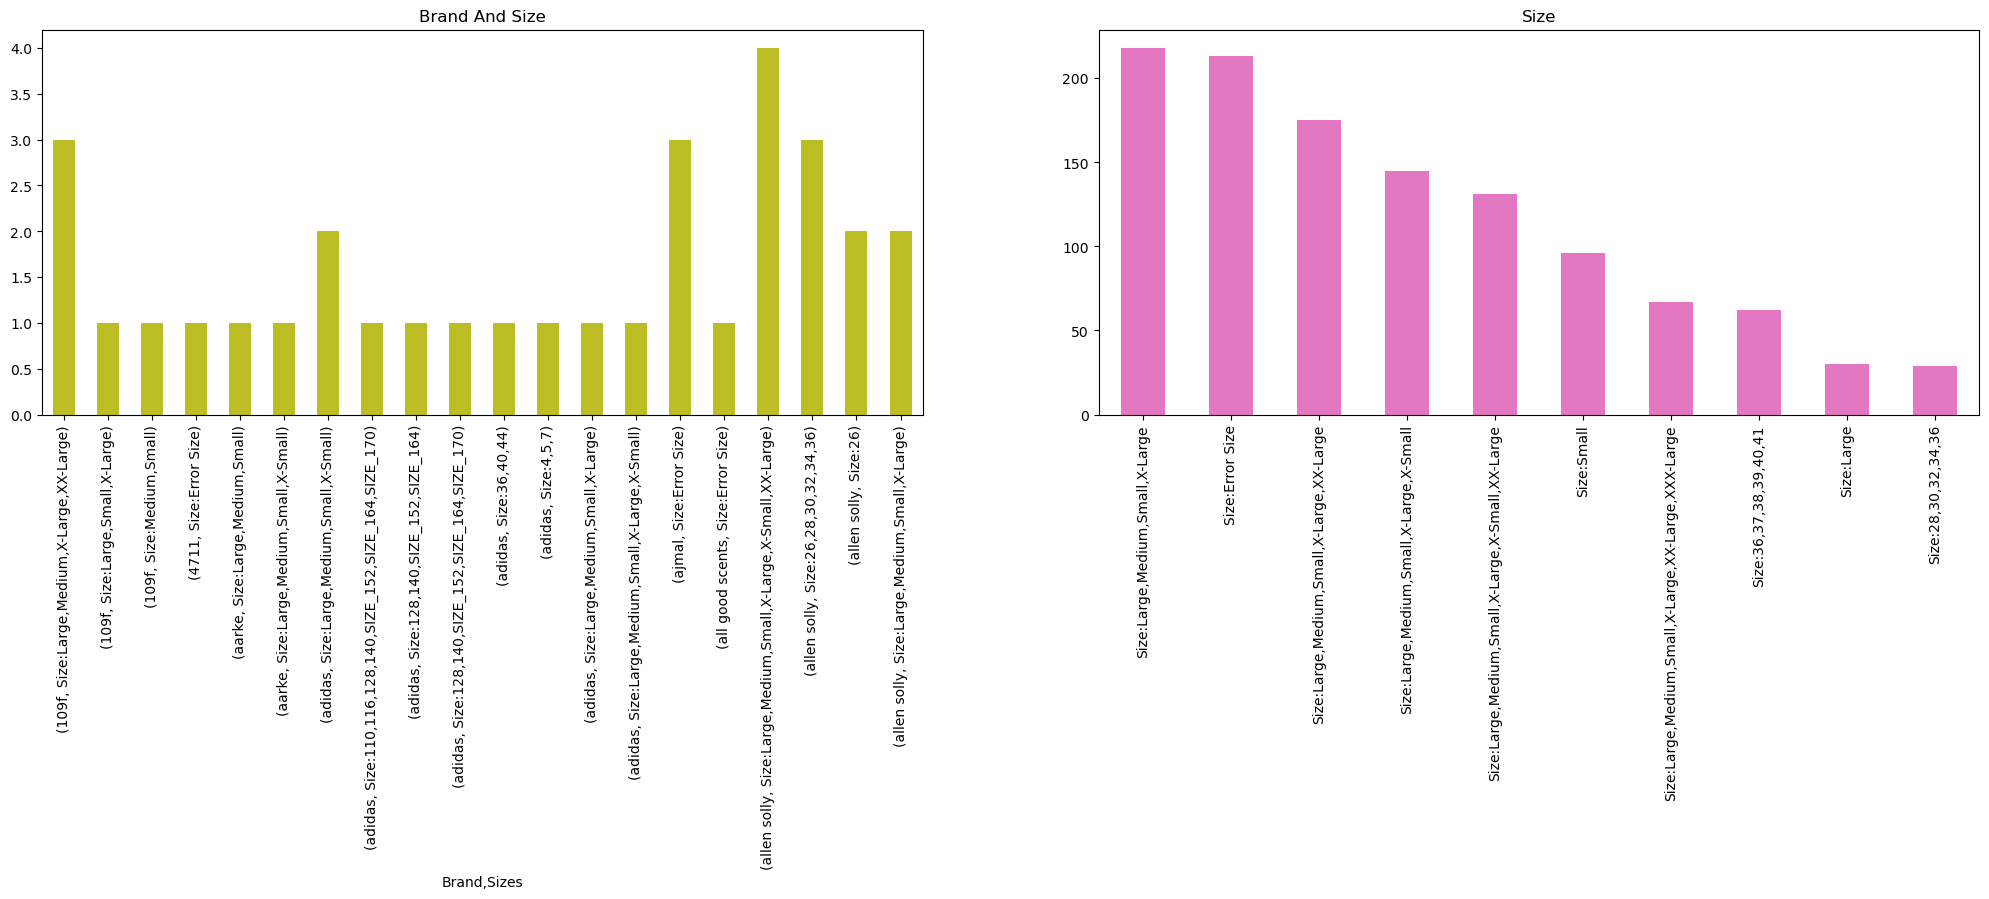

In [38]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title('Brand And Size')
size=fashion.groupby(['Brand'])['Sizes'].value_counts()
size.head(20).plot(kind='bar',color='#bcbd22')

plt.subplot(1,2,2)
plt.title('Size')
size2=fashion['Sizes'].value_counts().head(10)
size2.plot(kind='bar',color='#e377c2')

plt.show()